In [ ]:
#30DayMapChallenge Day 2: Lines
#Map of shots in the 2019 World Cup Group Stage match between USA and Thailand
#End result of 13-0 victory for the USA, with 40 shots to 2 in the process.
#Python #Jupyter #dataviz #USWNT 
#Data Source: @StatsBomb

In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
plt.style.use('fivethirtyeight')
import matplotlib.ticker as ticker

In [2]:
dforig = pd.read_json('22943.json')

In [3]:
#Setting up and cleaning dataset
df = dforig
df = df.fillna(0)
df = df.loc[df.location != 0]
df = df.drop(columns=['id','tactics', 'related_events', 'counterpress', 'under_pressure',
       'ball_recovery', 'goalkeeper', 'duel', 'dribble',
       'foul_committed', 'interception', 'block', 'foul_won',
       'substitution']).reset_index()
#Separating x and y coordinates
df['x'] = df['location']
df['y'] = df['location']
for i in range(len(df)):
    df['x'][i] = df.location[i][0]
    df['y'][i] = df.location[i][1]

C:\Users\matan\AppData\Local\Temp/ipykernel_37208/2588674563.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x'][i] = df.location[i][0]
C:\Users\matan\AppData\Local\Temp/ipykernel_37208/2588674563.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'][i] = df.location[i][1]


In [4]:
#Separating and cleaning shots data
shots = df.loc[df.type == {'id': 16, 'name': 'Shot'} ]
shots = shots.drop(columns=["index"]).reset_index()
shots = shots.drop(columns=["index"]).reset_index()

In [5]:
#Dataset of shots
shots

,index,level_0,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,carry,clearance,out,ball_receipt,shot,off_camera,50_50,half_start,x,y
0,0,131,1,2022-12-13 00:03:06.821,3,6,"{'id': 16, 'name': 'Shot'}",7,"{'id': 1214, 'name': 'United States Women's'}","{'id': 1, 'name': 'Regular Play'}",...,0,0,0.0,0,"{'statsbomb_xg': 0.054313116, 'end_location': ...",0.0,0,0,101.9,44.5
1,1,136,1,2022-12-13 00:03:09.619,3,9,"{'id': 16, 'name': 'Shot'}",7,"{'id': 1214, 'name': 'United States Women's'}","{'id': 1, 'name': 'Regular Play'}",...,0,0,0.0,0,"{'statsbomb_xg': 0.024853844, 'end_location': ...",0.0,0,0,94.7,30.0
2,2,195,1,2022-12-13 00:04:56.240,4,56,"{'id': 16, 'name': 'Shot'}",14,"{'id': 1214, 'name': 'United States Women's'}","{'id': 2, 'name': 'From Corner'}",...,0,0,0.0,0,"{'statsbomb_xg': 0.2821553, 'end_location': [1...",0.0,0,0,113.8,37.6
3,3,442,1,2022-12-13 00:10:31.885,10,31,"{'id': 16, 'name': 'Shot'}",26,"{'id': 1214, 'name': 'United States Women's'}","{'id': 1, 'name': 'Regular Play'}",...,0,0,0.0,0,"{'statsbomb_xg': 0.048318997, 'end_location': ...",0.0,0,0,106.4,38.7
4,4,471,1,2022-12-13 00:11:45.436,11,45,"{'id': 16, 'name': 'Shot'}",28,"{'id': 1214, 'name': 'United States Women's'}","{'id': 1, 'name': 'Regular Play'}",...,0,0,0.0,0,"{'statsbomb_xg': 0.31884623, 'end_location': [...",0.0,0,0,114.5,38.1
5,5,702,1,2022-12-13 00:17:19.979,17,19,"{'id': 16, 'name': 'Shot'}",38,"{'id': 1214, 'name': 'United States Women's'}","{'id': 1, 'name': 'Regular Play'}",...,0,0,0.0,0,"{'statsbomb_xg': 0.022786235000000002, 'end_lo...",0.0,0,0,96.6,30.1
6,6,777,1,2022-12-13 00:19:24.929,19,24,"{'id': 16, 'name': 'Shot'}",44,"{'id': 1214, 'name': 'United States Women's'}","{'id': 1, 'name': 'Regular Play'}",...,0,0,0.0,0,"{'statsbomb_xg': 0.054243624000000004, 'end_lo...",0.0,0,0,97.9,31.9
7,7,833,1,2022-12-13 00:21:25.155,21,25,"{'id': 16, 'name': 'Shot'}",47,"{'id': 1214, 'name': 'United States Women's'}","{'id': 4, 'name': 'From Throw In'}",...,0,0,0.0,0,"{'statsbomb_xg': 0.30806834, 'end_location': [...",0.0,0,0,114.4,45.2
8,8,1058,1,2022-12-13 00:28:00.966,28,0,"{'id': 16, 'name': 'Shot'}",62,"{'id': 1107, 'name': 'Thailand Women's'}","{'id': 4, 'name': 'From Throw In'}",...,0,0,0.0,0,"{'statsbomb_xg': 0.011697948000000001, 'end_lo...",0.0,0,0,93.0,23.8
9,9,1168,1,2022-12-13 00:31:14.027,31,14,"{'id': 16, 'name': 'Shot'}",69,"{'id': 1214, 'name': 'United States Women's'}","{'id': 3, 'name': 'From Free Kick'}",...,0,0,0.0,0,"{'statsbomb_xg': 0.24248378, 'end_location': [...",0.0,0,0,113.2,37.7


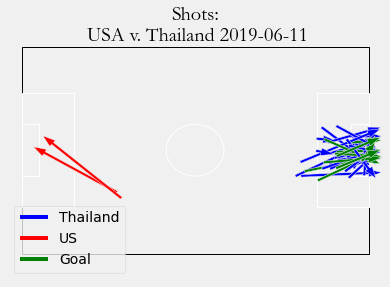

In [6]:
fig, ax = plt.subplots()
hfont = {'fontname':'Garamond'}
# Giving title to the plot
plt.title("Shots:\n USA v. Thailand 2019-06-11", **hfont, c= "black")
# Create a Rectangle patch
rect = patches.Rectangle((0, 0), 120, -80, linewidth=1, edgecolor='black', facecolor='none')
rect2 = patches.Rectangle((0,-18), 18, 18-62, linewidth=1, edgecolor='white', facecolor='none')
rect21 = patches.Rectangle((102,-18), 18, 18-62, linewidth=1, edgecolor='white', facecolor='none')
rect3 = patches.Rectangle((0,-30), 6, 30-50, linewidth=1, edgecolor='white', facecolor='none')
rect31 = patches.Rectangle((114,-30), 6, 30-50, linewidth=1, edgecolor='white', facecolor='none')
circ = patches.Circle((60,-40), 10, linewidth=1, edgecolor='white', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
ax.add_patch(rect2)
ax.add_patch(rect21)
ax.add_patch(rect3)
ax.add_patch(rect31)
ax.add_patch(circ)
plt.grid('off')
plt.axis('off')
#Plotting all shots in the match
for i in range(len(shots)):
    test = shots.loc[i]
    if (test.possession_team == {'id': 1214, 'name': "United States Women's"}):
        col = "blue"
        if (test.shot["outcome"] == {'id': 97, 'name': 'Goal'}):
            col = "green"
        plt.arrow(test.x, 0-test.y, test.shot["end_location"][0]-test.x,  0-test.shot["end_location"][1]+test.y, width=1, facecolor=col)
    else:
        plt.arrow(test.x-60, 0-test.y, 60-test.shot["end_location"][0]+test.x-60,  0-test.shot["end_location"][1]+test.y, width=1, facecolor="red")
plt.xlim([-5, 125])
plt.ylim([10, -80])
#Legend creation
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='b', lw=4, label='Thailand'),
                   Line2D([0], [0], color='r', label='US'),
                  Line2D([0], [0], color='g', label='Goal')]
ax.legend(handles=legend_elements, loc='lower left', labelcolor ="black")
plt.show()

In [7]:
#Various locations of players at the point of a shot
shots["shot"][2]

{'statsbomb_xg': 0.2821553,
 'end_location': [118.7, 42.7],
 'key_pass_id': '6c26dcd3-8766-47a8-b7fa-d75442d69f59',
 'technique': {'id': 93, 'name': 'Normal'},
 'body_part': {'id': 37, 'name': 'Head'},
 'type': {'id': 87, 'name': 'Open Play'},
 'outcome': {'id': 96, 'name': 'Blocked'},
 'freeze_frame': [{'location': [94.7, 54.6],
   'player': {'id': 4949, 'name': 'Rosemary Kathleen Lavelle'},
   'position': {'id': 13, 'name': 'Right Center Midfield'},
   'teammate': True},
  {'location': [94.1, 61.6],
   'player': {'id': 5021, 'name': "Kelley Maureen O''Hara"},
   'position': {'id': 2, 'name': 'Right Back'},
   'teammate': True},
  {'location': [113.8, 35.2],
   'player': {'id': 5087, 'name': 'Samantha June Mewis'},
   'position': {'id': 15, 'name': 'Left Center Midfield'},
   'teammate': True},
  {'location': [114.3, 42.7],
   'player': {'id': 5085, 'name': 'Alexandra Morgan Carrasco'},
   'position': {'id': 23, 'name': 'Center Forward'},
   'teammate': True},
  {'location': [102.7, 3